In [32]:
#ROB538 HW3

#Problem 1

import numpy as np
import matplotlib.pyplot as plt


class Agent:
    def __init__(self,K):
        self.g = 0
        self.states = []  # record position and action taken at the position
        self.actions = list(range(0,K)) #Set list of days as actions
        self.lr = 0.2 #learning rate, takes longer when low
        self.exp_rate = 0.01 #exploration rate .7
        self.decay_gamma = 0.85 #Reward decay does not work well when 1 .85

        self.switch = False

        # initial Q values
        self.Q_values = list(range(0,K))
        for a in self.actions:
            self.Q_values[a] = 0  # Q value is a dict of dict

    def giveReward(self,x_k,b,x_k_z):
        self.indiv = x_k*np.exp(-x_k/b)
        
        self.G = 0 
        for x_k_g in x_k_z:
            self.G = x_k_g*np.exp(-x_k_g/b) +self.G
        #Add a difference reward here later
        self.minusi = 0
        self.diff = 0
        #Get list for if agent didnt exist
        self.x_k_2 = np.array(x_k_z)
        self.x_k_2[self.action] = self.x_k_2[self.action] - 1
        #Repeat reward calculation
        for x_k_g2 in self.x_k_2:
            self.minusi = x_k_g2*np.exp(-x_k_g2/b) + self.minusi
        #Calculate difference reward
        self.diff = self.G-self.minusi
        #Now calculate "average difference reward"
        days = len(self.actions)
        self.x_k_2 = self.x_k_2 + 1/days
        for x_k_g2 in self.x_k_2:
            self.minusi = x_k_g2*np.exp(-x_k_g2/b) + self.minusi
        self.diff2 = self.G-self.minusi
        

        return self.indiv,self.G,self.diff,self.diff2

    def State(self):
        pass

    def chooseAction(self):
        # choose action with most expected value
        mx_nxt_reward = 0
        action = ""

        #Exploration action
        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                nxt_reward = self.Q_values[a]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
                
        if action == "":    
            action = np.random.choice(self.actions)
            # print("current pos: {}, greedy aciton: {}".format(self.State.state, action))
        return action
    
    def reset(self):
        self.states = []
        self.reward = 0
        self.switch = False
    
    
    def play(self, i,x_k,b,x_k_z,rtype):
        if not self.switch:
            # to the end of game back propagate reward
            self.action = self.chooseAction()
            # append trace
            self.states.append(self.action) #Choose 1-6
            #print("current position {} action {}".format(self.State.state, action))
            # mark is end
            #self.State.isEndFunc()
            self.switch = True
            return(i,self)
        else:
        # back propagate
            reward1,reward2,reward3,reward4 = self.giveReward(x_k,b,x_k_z)
            rlist = [reward1,reward2,reward3,reward4]
            reward = rlist[rtype]
            self.Q_values[self.action] = reward
            for s in reversed(self.states):
                current_q_value = self.Q_values
                reward = current_q_value + self.lr * (self.decay_gamma * reward - current_q_value)
                self.Q_values = reward
            self.reset()
            i += 1
            return(i,self)
        



if __name__ == "__main__":
    def run(N,b,k,cycles,reward_type):
        #initialize agents
        #N = 25
        Agent_list = []
        Action_list = [0]*N
        
        #b = 5
        #k = 7
        x_k = [0]*N
        Count_list = [0]*k
        Decision = [0]*k
        #Create list of agent objects, each initialized
        for i in range(N):
            Agent_list.append(Agent(k))

        #print(Agent_list[8].g) gives g
        #Agent_list[8].indiv_reward(8,5)
        #print(Agent_list[8].indiv)
        i = np.zeros(N)
        count = 0
        max = 0
        while count<1:
            i = np.zeros(N)
            while i[0]<cycles:
                for x in range(N):
                    i[x],Agent_list[x] = Agent_list[x].play(i[x],x_k[x],b,Count_list,reward_type)
                    #Get info on actions here
                    Action_list[x] = Agent_list[x].action
                    #Count up all
                    Count_list[Action_list[x]] = Count_list[Action_list[x]] + 1
                for y in range(N):
                    #Set all x_k values and run again 
                    x_k[y] = Count_list[Action_list[y]] #Number of people who attended same day
                for z in range(N):
                    #Now distribute rewards
                    i[z],Agent_list[z] = Agent_list[z].play(i[z],x_k[z],b,Count_list,reward_type)
                #Reset Count List?
                Count_list = [0]*k
            #print(Agent_list[0].Q_values)
            for i in range(N):
                #For each agent
                #Get the index of the maximum q_value
                index = np.argmax(Agent_list[i].Q_values)
                Decision[index] = Decision[index] + 1 
            count = count+1
        return(Agent_list[0].G,Decision)
        
    
    

    


    
    

In [33]:
# fit,check = np.polyfit(np.log(arr),score , 1,cov=True)

# fit_1 = fit[0]*np.log(arr) + fit[1]
# fit_2 = (fit[0]+np.sqrt(check[0][0]))*np.log(arr)+fit[1]+np.sqrt(check[1][1])
# fit_3 = (fit[0]-np.sqrt(check[0][0]))*np.log(arr)+fit[1]-np.sqrt(check[1][1])
# plt.plot(arr,score,'m.',markersize = 2,label = "Difference 2 Reward Data")
# plt.plot(arr,fit_1,'m-',label = "Difference 2 Reward Log Fit") 
# plt.plot(arr,fit_2,'m--',label = "Difference 2 Reward Log Fit 2") 
# plt.plot(arr,fit_3,'m--',label = "Difference 2 Reward Log Fit 3") 
# plt.xlim([0,500])
# plt.ylim([0,14])

In [34]:
# trials = 400
# trials_average = 10
    
# arr = np.arange(1,trials+1,5) #Every five trails
# score = np.zeros(arr.size)
# ind = 0
# for i in range(trials_average):
#     for a in arr:
        
#         if a == 0:
#             pass
#         else:
#             score[ind] = run(25,5,7,a,reward_type = 0) + score[ind]
#         ind = ind+1
# ind = 0
# for a in arr:
#     if a ==0:
#         pass
#     else:
#         score[ind] = score[ind]/trials_average
# #print(score)
# fit = np.polyfit(np.log(arr),score , 1)
# fit_1 = fit[0]*np.log(arr) + fit[1]
# plt.plot(arr,score,'b.',markersize = 2,label = "Individual Reward Data")
# plt.plot(arr,fit_1,'b--') 


# ind = 0
# for a in arr:
    
#     if a == 0:
#         pass
#     else:
#         score[ind] = run(25,5,7,a,reward_type = 1)
#     ind = ind+1
# #print(score)
# fit = np.polyfit(np.log(arr),score , 1)
# fit_1 = fit[0]*np.log(arr) + fit[1]
# plt.plot(arr,score,'r.',markersize = 2,label = "Global Reward Data")
# plt.plot(arr,fit_1,'r--') 


# ind = 0
# for a in arr:
    
#     if a == 0:
#         pass
#     else:
#         score[ind] = run(25,5,7,a,reward_type = 2)
#     ind = ind+1
# #print(score)
# fit = np.polyfit(np.log(arr),score , 1)
# fit_1 = fit[0]*np.log(arr) + fit[1]
# plt.plot(arr,score,'g.',markersize = 2,label = "Difference Reward Data")
# plt.plot(arr,fit_1,'g--') 


# ind = 0
# for a in arr:
    
#     if a == 0:
#         pass
#     else:
#         score[ind] = run(25,5,7,a,reward_type = 3)
#     ind = ind+1
# #print(score)
# fit = np.polyfit(np.log(arr),score , 1)
# fit_1 = fit[0]*np.log(arr) + fit[1]
# plt.plot(arr,score,'m.',markersize = 2,label = "Difference 2 Reward Data")
# plt.plot(arr,fit_1,'m--') 
# plt.xlim([0,400])
# plt.ylim([0,14])
# plt.legend(fontsize = 'small',loc = 'lower right')

In [64]:
trials = 250
trials_average = 20
    
arr = np.arange(1,trials+1,5) #Every five trails
score1 = np.zeros(arr.size)
Histogram1 = np.zeros(7)
ind = 0
for i in range(trials_average):
    ind = 0
    for a in arr:
        
        if a == 0:
            pass
        else:
            score,decision = run(25,5,7,a,reward_type = 0)
            score1[ind] = score +score1[ind]
        ind = ind+1
    Histogram1 = Histogram1 + decision
ind = 0

for a in arr:
    if a == 0:
        pass
    else:
        score1[ind] = score1[ind]/trials_average
    ind = ind+1
Histogram1 = Histogram1/trials_average
#print(score)
    
score11 = np.zeros(arr.size)
Histogram11 = np.zeros(6)
ind = 0
for i in range(trials_average):
    ind = 0
    for a in arr:
        
        if a == 0:
            pass
        else:
            score,decision = run(40,4,6,a,reward_type = 0)
            score11[ind] = score +score11[ind]
        ind = ind+1
    Histogram11 = Histogram11 + decision
ind = 0
for a in arr:
    if a == 0:
        pass
    else:
        score11[ind] = score11[ind]/trials_average
    ind = ind+1
Histogram11 = Histogram11/trials_average

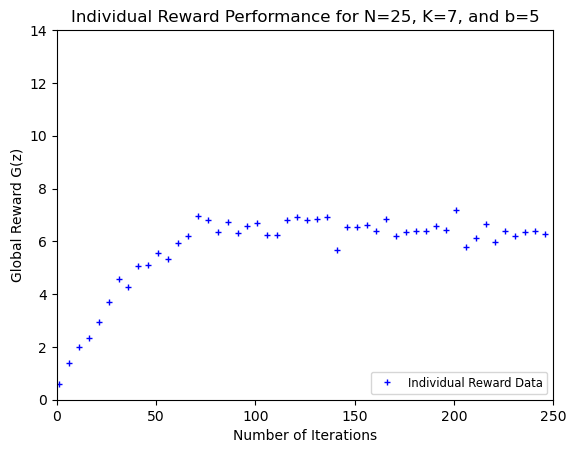

In [65]:
fit1 = np.polyfit(np.log(arr),score1 , 1)
fit_11 = fit1[0]*np.log(arr) + fit1[1]
plt.plot(arr,score1,'b+',markersize = 4,label = "Individual Reward Data")
#plt.plot(arr,fit_11,'b--',label = "Log Fit") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Individual Reward Performance for N=25, K=7, and b=5")
plt.legend(fontsize = 'small',loc = 'lower right')

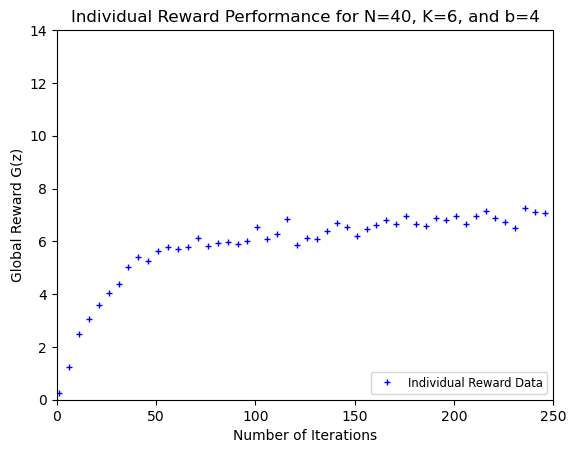

In [66]:
fit11 = np.polyfit(np.log(arr),score11 , 1)
fit_111 = fit11[0]*np.log(arr) + fit11[1]
plt.plot(arr,score11,'b+',markersize = 4,label = "Individual Reward Data")
#plt.plot(arr,fit_111,'b--',label = "Log Fit") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Individual Reward Performance for N=40, K=6, and b=4")
plt.legend(fontsize = 'small',loc = 'lower right')

In [73]:
score2 = np.zeros(arr.size)
Histogram2 = np.zeros(7)
ind = 0
for i in range(trials_average):
    ind = 0
    for a in arr:
        
        if a == 0:
            pass
        else:
            score,decision = run(25,5,7,a,reward_type = 1)
            score2[ind] =  score+score2[ind]
        ind = ind+1
    Histogram2 = Histogram2 + decision
ind = 0
for a in arr:
    if a == 0:
        pass
    else:
        score2[ind] = score2[ind]/trials_average
    ind = ind+1
Histogram2 = Histogram2/trials_average

score22 = np.zeros(arr.size)
Histogram22 = np.zeros(6)
ind = 0
for i in range(trials_average):
    ind = 0
    for a in arr:
        
        if a == 0:
            pass
        else:
            score, decision = run(40,4,6,a,reward_type = 1)
            score22[ind] =  score +score22[ind]
        ind = ind+1
    Histogram22 = Histogram22+decision
ind = 0
for a in arr:
    if a == 0:
        pass
    else:
        score22[ind] = score22[ind]/trials_average
    ind = ind+1
Histogram22 = Histogram22/trials_average

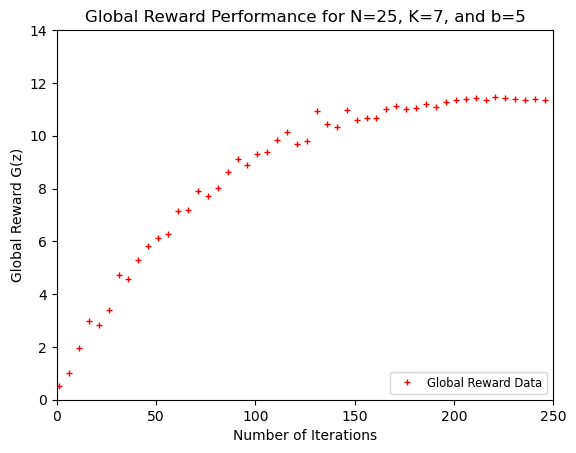

In [74]:
fit2 = np.polyfit(np.log(arr),score2 , 1)
fit_12 = fit2[0]*np.log(arr) + fit2[1]
plt.plot(arr,score2,'r+',markersize = 4,label = "Global Reward Data")
#plt.plot(arr,fit_12,'r--',label = "Log Fit") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Global Reward Performance for N=25, K=7, and b=5")
plt.legend(fontsize = 'small',loc = 'lower right')

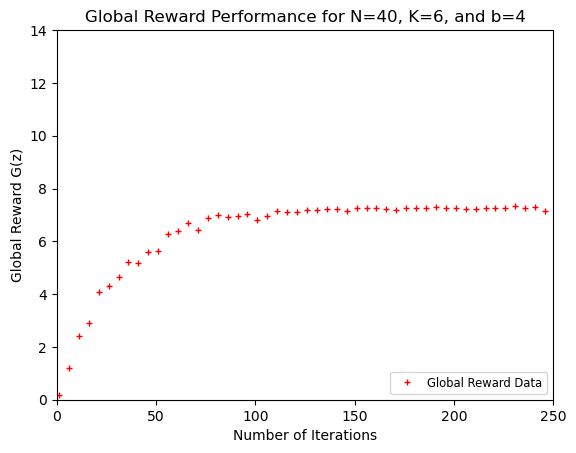

In [75]:
fit22 = np.polyfit(np.log(arr),score22 , 1)
fit_122 = fit22[0]*np.log(arr) + fit22[1]
plt.plot(arr,score22,'r+',markersize = 4,label = "Global Reward Data")
#plt.plot(arr,fit_122,'r--',label = "Log Fit") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Global Reward Performance for N=40, K=6, and b=4")
plt.legend(fontsize = 'small',loc = 'lower right')

In [76]:
score3 = np.zeros(arr.size)
Histogram3 = np.zeros(7)
ind = 0
for i in range(trials_average):
    ind = 0
    for a in arr:
        
        if a == 0:
            pass
        else:
            score, decision = run(25,5,7,a,reward_type = 2)
            score3[ind] =  score+score3[ind]
        ind = ind+1
    Histogram3 = Histogram3+decision
ind = 0
for a in arr:
    if a == 0:
        pass
    else:
        score3[ind] = score3[ind]/trials_average
    ind = ind+1
Histogram3 = Histogram3/trials_average

score33 = np.zeros(arr.size)
Histogram33 = np.zeros(6)
ind = 0
for i in range(trials_average):
    ind = 0
    for a in arr:
        
        if a == 0:
            pass
        else:
            score,decision = run(40,4,6,a,reward_type = 2)
            score33[ind] = score +score33[ind]
        ind = ind+1
    Histogram33 = Histogram33+decision
ind = 0
for a in arr:
    if a == 0:
        pass
    else:
        score33[ind] = score33[ind]/trials_average
    ind = ind+1
Histogram33 = Histogram33/trials_average

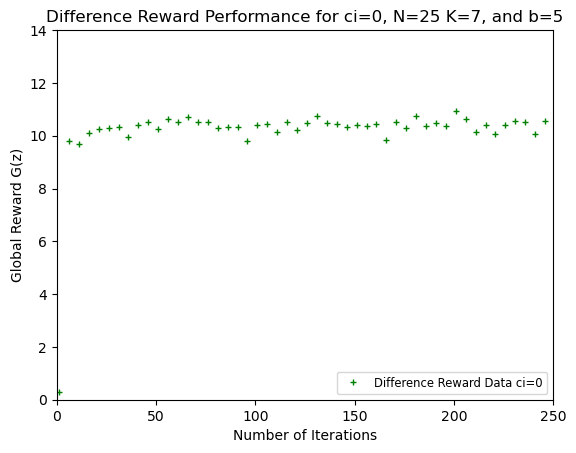

In [77]:
fit3 = np.polyfit(np.log(arr),score3 , 1)
fit_13 = fit3[0]*np.log(arr) + fit3[1]
plt.plot(arr,score3,'g+',markersize = 4,label = "Difference Reward Data ci=0")
#plt.plot(arr,fit_13,'g--',label = "Log Fit ci=0") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Difference Reward Performance for ci=0, N=25 K=7, and b=5")
plt.legend(fontsize = 'small',loc = 'lower right')

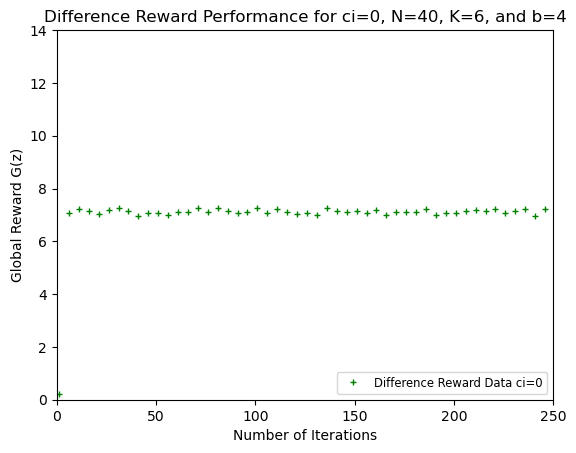

In [78]:
fit33 = np.polyfit(np.log(arr),score33 , 1)
fit_133 = fit33[0]*np.log(arr) + fit33[1]
plt.plot(arr,score33,'g+',markersize = 4,label = "Difference Reward Data ci=0")
#plt.plot(arr,fit_133,'g--',label = "Log Fit ci=0") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Difference Reward Performance for ci=0, N=40, K=6, and b=4")
plt.legend(fontsize = 'small',loc = 'lower right')

In [79]:
score4 = np.zeros(arr.size)
Histogram4 = np.zeros(7)
ind = 0
for i in range(trials_average):
    ind = 0
    for a in arr:
        
        if a == 0:
            pass
        else:
            score,decision = run(25,5,7,a,reward_type = 3)
            score4[ind] = score +score4[ind]
        ind = ind+1
    Histogram4 = Histogram4 + decision
ind = 0
for a in arr:
    if a == 0:
        pass
    else:
        score4[ind] = score4[ind]/trials_average
    ind = ind+1
Histogram4 = Histogram4/trials_average

score44 = np.zeros(arr.size)
Histogram44 = np.zeros(6)
ind = 0
for i in range(trials_average):
    ind = 0
    for a in arr:
        
        if a == 0:
            pass
        else:
            score, decision = run(40,4,6,a,reward_type = 3)
            score44[ind] =  score+score44[ind]
        ind = ind+1
    Histogram44 = Histogram44 + decision
ind = 0
for a in arr:
    if a == 0:
        pass
    else:
        score44[ind] = score44[ind]/trials_average
    ind = ind+1
Histogram44 = Histogram44/trials_average

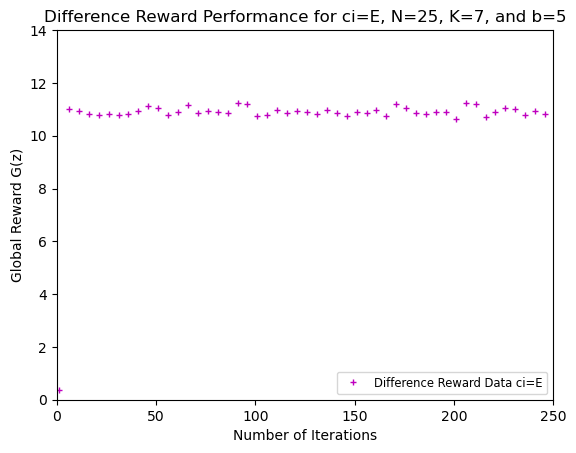

In [80]:
fit4 = np.polyfit(np.log(arr),score4 , 1)
fit_14 = fit4[0]*np.log(arr) + fit4[1]
plt.plot(arr,score4,'m+',markersize = 4,label = "Difference Reward Data ci=E")
#plt.plot(arr,fit_14,'m--',label = "Log Fit ci=E") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Difference Reward Performance for ci=E, N=25, K=7, and b=5")
plt.legend(fontsize = 'small',loc = 'lower right')

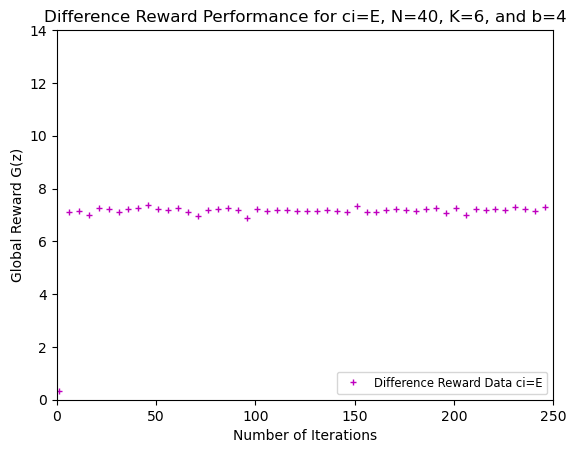

In [81]:
fit44 = np.polyfit(np.log(arr),score44 , 1)
fit_144 = fit44[0]*np.log(arr) + fit44[1]
plt.plot(arr,score44,'m+',markersize = 4,label = "Difference Reward Data ci=E")
#plt.plot(arr,fit_144,'m--',label = "Log Fit ci=E") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Difference Reward Performance for ci=E, N=40, K=6, and b=4")
plt.legend(fontsize = 'small',loc = 'lower right')

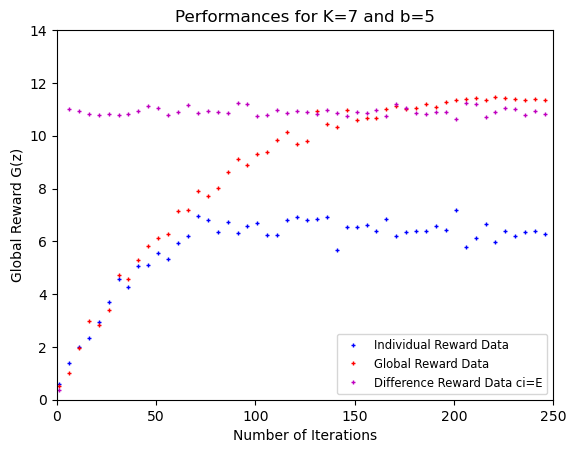

In [82]:
plt.plot(arr,score1,'b+',markersize = 3,label = "Individual Reward Data")
#plt.plot(arr,fit_11,'b--',label = "Log Fit Individual") 
plt.plot(arr,score2,'r+',markersize = 3,label = "Global Reward Data")
#plt.plot(arr,fit_12,'r--',label = "Log Fit Global") 
plt.plot(arr,score4,'m+',markersize = 3,label = "Difference Reward Data ci=E")
#plt.plot(arr,fit_14,'m--',label = "Log Fit ci=E") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Performances for K=7 and b=5")
plt.legend(fontsize = 'small',loc = 'lower right')

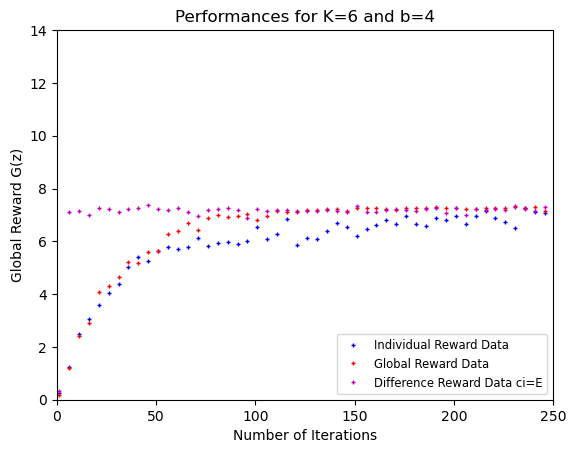

In [83]:
plt.plot(arr,score11,'b+',markersize = 3,label = "Individual Reward Data")
#plt.plot(arr,fit_111,'b--',label = "Log Fit Individual") 
plt.plot(arr,score22,'r+',markersize = 3,label = "Global Reward Data")
#plt.plot(arr,fit_122,'r--',label = "Log Fit Global") 
plt.plot(arr,score44,'m+',markersize = 3,label = "Difference Reward Data ci=E")
#plt.plot(arr,fit_144,'m--',label = "Log Fit ci=E") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Performances for K=6 and b=4")
plt.legend(fontsize = 'small',loc = 'lower right')

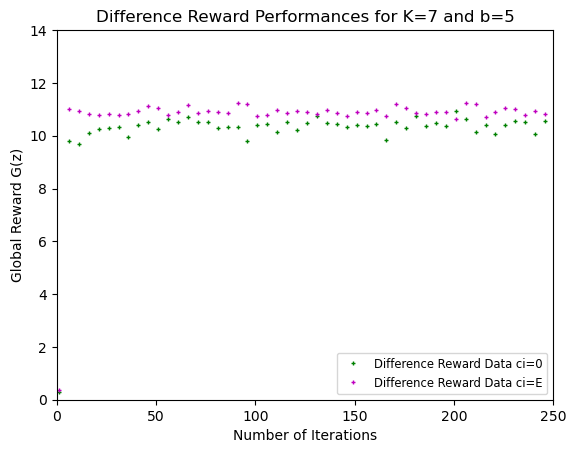

In [85]:
plt.plot(arr,score3,'g+',markersize = 3,label = "Difference Reward Data ci=0")
plt.plot(arr,score4,'m+',markersize = 3,label = "Difference Reward Data ci=E")
#plt.plot(arr,fit_144,'m--',label = "Log Fit ci=E") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Difference Reward Performances for K=7 and b=5")
plt.legend(fontsize = 'small',loc = 'lower right')

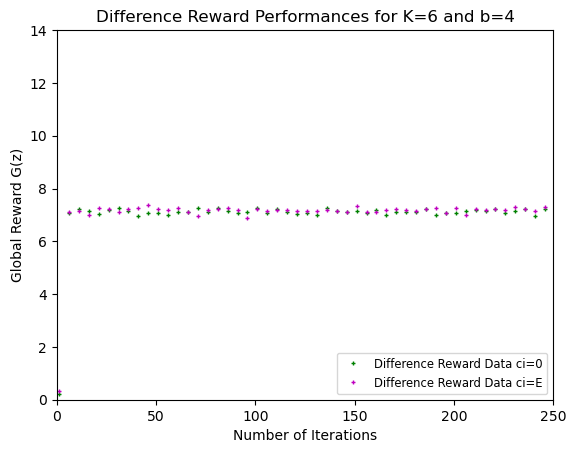

In [86]:
plt.plot(arr,score33,'g+',markersize = 3,label = "Difference Reward Data ci=0")
plt.plot(arr,score44,'m+',markersize = 3,label = "Difference Reward Data ci=E")
#plt.plot(arr,fit_144,'m--',label = "Log Fit ci=E") 
plt.xlim([0,trials])
plt.ylim([0,14])
plt.xlabel("Number of Iterations")
plt.ylabel("Global Reward G(z)")
plt.title("Difference Reward Performances for K=6 and b=4")
plt.legend(fontsize = 'small',loc = 'lower right')

Text(0.5, 1.0, 'Individual Reward Choice Histogram for N=25, K=7, and b=5')

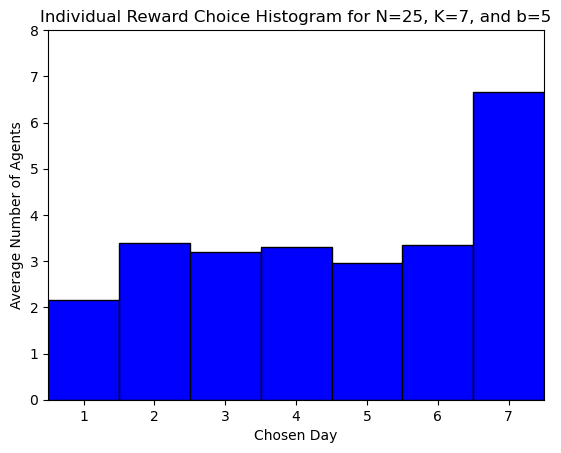

In [87]:
array1 = np.arange(1,8)
plt.bar(array1,Histogram1,width=1,edgecolor='black',color='b')
plt.xlim([0.5,7.5])
plt.ylim([0,8])
plt.xlabel("Chosen Day")
plt.ylabel("Average Number of Agents")
plt.title("Individual Reward Choice Histogram for N=25, K=7, and b=5")



Text(0.5, 1.0, 'Individual Reward Choice Histogram for N=40, K=6, and b=4')

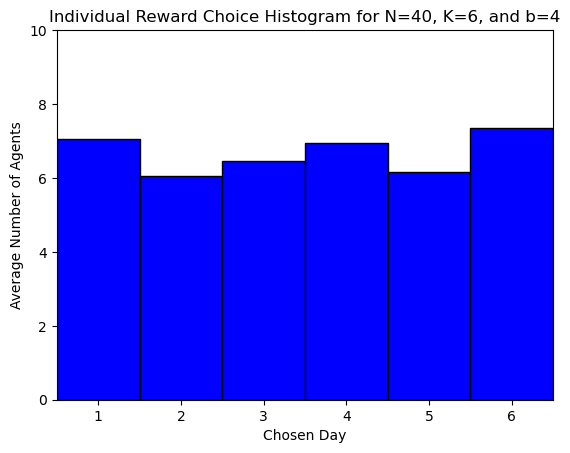

In [88]:
array2 = np.arange(1,7)
plt.bar(array2,Histogram11,width=1,edgecolor='black',color='b')
plt.xlim([0.5,6.5])
plt.ylim([0,10])
plt.xlabel("Chosen Day")
plt.ylabel("Average Number of Agents")
plt.title("Individual Reward Choice Histogram for N=40, K=6, and b=4")

Text(0.5, 1.0, 'Global Reward Choice Histogram for N=25, K=7, and b=5')

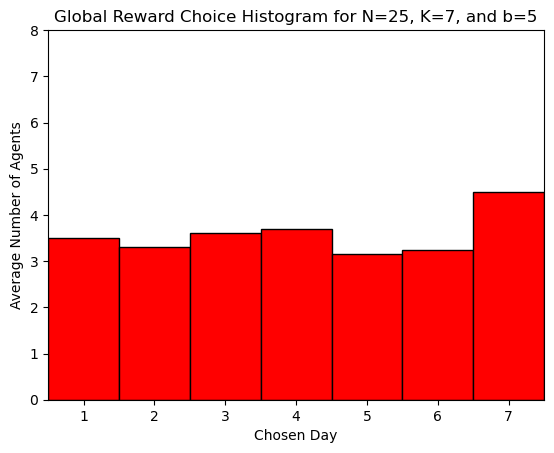

In [94]:
array1 = np.arange(1,8)
plt.bar(array1,Histogram2,width=1,edgecolor='black',color='r')
plt.xlim([0.5,7.5])
plt.ylim([0,8])
plt.xlabel("Chosen Day")
plt.ylabel("Average Number of Agents")
plt.title("Global Reward Choice Histogram for N=25, K=7, and b=5")

Text(0.5, 1.0, 'Global Reward Choice Histogram for N=40, K=6, and b=4')

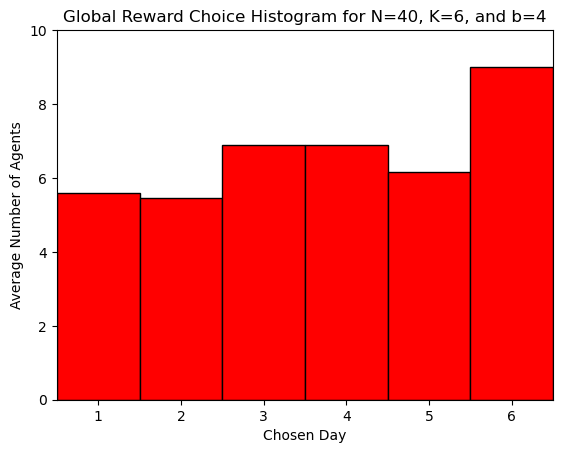

In [95]:
array2 = np.arange(1,7)
plt.bar(array2,Histogram22,width=1,edgecolor='black',color='r')
plt.xlim([0.5,6.5])
plt.ylim([0,10])
plt.xlabel("Chosen Day")
plt.ylabel("Average Number of Agents")
plt.title("Global Reward Choice Histogram for N=40, K=6, and b=4")

Text(0.5, 1.0, 'Difference Reward ci=0 Choice Histogram for N=25, K=7, and b=5')

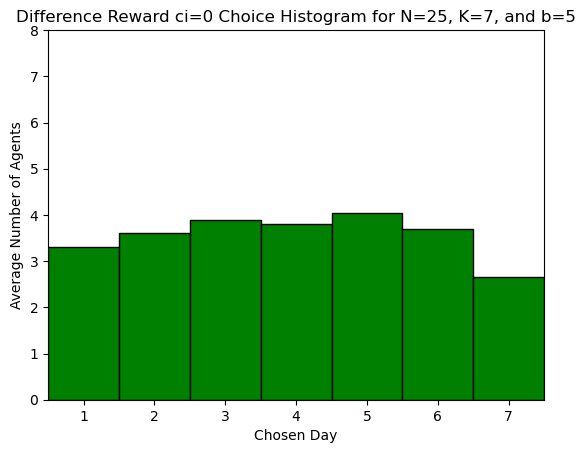

In [96]:
array1 = np.arange(1,8)
plt.bar(array1,Histogram3,width=1,edgecolor='black',color='g')
plt.xlim([0.5,7.5])
plt.ylim([0,8])
plt.xlabel("Chosen Day")
plt.ylabel("Average Number of Agents")
plt.title("Difference Reward ci=0 Choice Histogram for N=25, K=7, and b=5")

Text(0.5, 1.0, 'Difference Reward ci=0 Choice Histogram for N=40, K=6, and b=4')

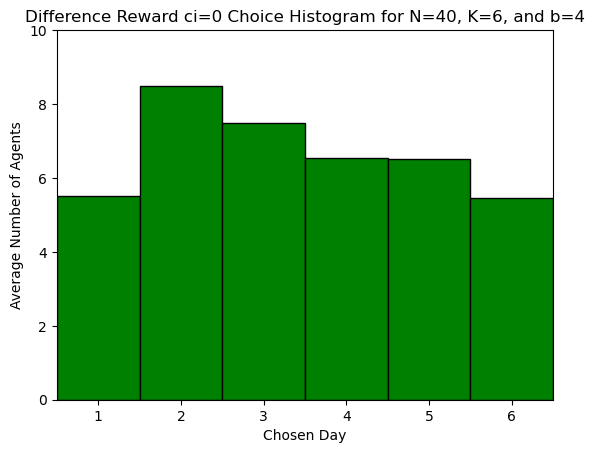

In [97]:
array2 = np.arange(1,7)
plt.bar(array2,Histogram33,width=1,edgecolor='black',color='g')
plt.xlim([0.5,6.5])
plt.ylim([0,10])
plt.xlabel("Chosen Day")
plt.ylabel("Average Number of Agents")
plt.title("Difference Reward ci=0 Choice Histogram for N=40, K=6, and b=4")

Text(0.5, 1.0, 'Difference Reward ci=E Choice Histogram for N=25, K=7, and b=5')

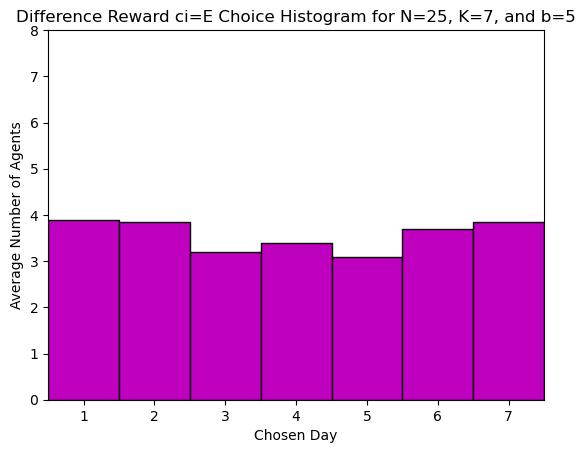

In [98]:
array1 = np.arange(1,8)
plt.bar(array1,Histogram4,width=1,edgecolor='black',color='m')
plt.xlim([0.5,7.5])
plt.ylim([0,8])
plt.xlabel("Chosen Day")
plt.ylabel("Average Number of Agents")
plt.title("Difference Reward ci=E Choice Histogram for N=25, K=7, and b=5")

Text(0.5, 1.0, 'Difference Reward ci=E Choice Histogram for N=40, K=6, and b=4')

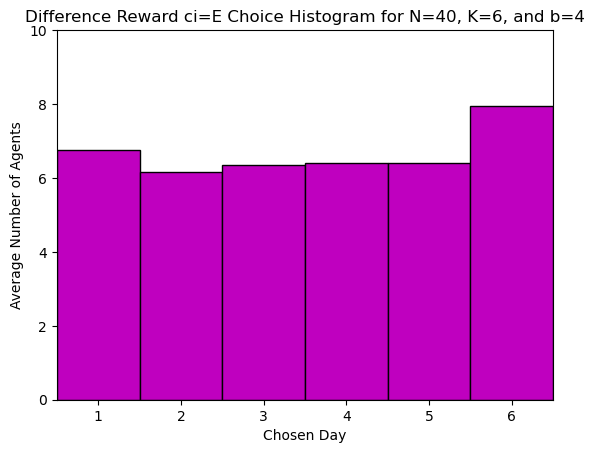

In [99]:
array2 = np.arange(1,7)
plt.bar(array2,Histogram44,width=1,edgecolor='black',color='m')
plt.xlim([0.5,6.5])
plt.ylim([0,10])
plt.xlabel("Chosen Day")
plt.ylabel("Average Number of Agents")
plt.title("Difference Reward ci=E Choice Histogram for N=40, K=6, and b=4")